# LTA DataMall API User Guide

Reference document url: https://datamall.lta.gov.sg/content/dam/datamall/datasets/LTA_DataMall_API_User_Guide.pdf

In [45]:
import os,sys
#PROJECT_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
#sys.path.insert(0, PROJECT_PATH)

In [46]:
# Import api key from api_key.py's LTA_API_KEY
from conf.api_key import LTA_API_KEY
from typing import Union, Dict
import pandas as pd
from PIL import Image
from PIL import UnidentifiedImageError
import requests
# Importing the geodesic module from the library 
from geopy.distance import geodesic

In [47]:
def api_query(api_link: str,  agent_id: str, api_key: str, params_dict: Dict = None) -> Union[Dict,None]:
    """Function which executes query via an api link using a provided agent_id as an identifier to avoid rejection of query request

    Args:
        api_link (str): API Link which requests is to be made
        agent_id (str): Id used for request header
        api_key (str): API Key provided
        params_dict (Dict): Dictionary containing parameters to be passed in requests' get method

    Returns:
        Dictionary containing request content. None when exception are encountered.
    """
    req_headers = {"User-agent": agent_id, "AccountKey": api_key, "Content-Type": "application/json"}
    try:
        res = requests.get(url=api_link,
                           params=params_dict,
                           headers=req_headers,
                           timeout=5)
        # Raise if HTTPError occured
        res.raise_for_status()

        # Check the status code before extending the number of posts
        if res.status_code == 200:
            print(f"Request successful with status code {res.status_code}")
            the_json = res.json()
            return the_json
        else:
            print(f"Return unssucessful with status code {res.status_code}")
            return res.status_code

    except requests.exceptions.HTTPError as errh:
        print(errh)
    except requests.exceptions.ConnectionError as errc:
        print(errc)
    except requests.exceptions.Timeout as errt:
        print(errt)
    except requests.exceptions.RequestException as err:
        print(err)
    return None

## List of 27 API URLs provided by LTA Datamall as of 04 Apr 2023 v5.5 Document
|API|URL|Update Frequency|Parameters|Response type|
|---|---|---|---|---|
|Bus Arrival|http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2|1min|*BusStopCode*;*ServiceNo*|Various Attributes|
|Bus Services|http://datamall2.mytransport.sg/ltaodataservice/BusServices|Ad hoc||Various Attributes|
|Bus Routes|http://datamall2.mytransport.sg/ltaodataservice/BusRoutes|Ad Hoc||Various Attributes|
|Bus Stops|http://datamall2.mytransport.sg/ltaodataservice/BusStops|Ad Hoc||Various Attributes|
|Passenger Volume by Bus Stops|http://datamall2.mytransport.sg/ltaodataservice/PV/Bus|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Passenger Volume By Origin Destination Bus Stops|http://datamall2.mytransport.sg/ltaodataservice/PV/ODBus|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Passenger Volume By Origin Destination Train Stations|http://datamall2.mytransport.sg/ltaodataservice/PV/ODTrain|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Passenger Volume By Train Stations|http://datamall2.mytransport.sg/ltaodataservice/PV/Train|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Taxi Availability|http://datamall2.mytransport.sg/ltaodataservice/Taxi-Availability|1 min||Latitude/Longitude Attribute|
|Taxi Stands|http://datamall2.mytransport.sg/ltaodataservice/TaxiStands|Monthly||Various Attributes|
|Train Service Alerts|http://datamall2.mytransport.sg/ltaodataservice/TrainServiceAlerts|Ad hoc||Various Attributes|
|Carpark Availability(HDB/LTA/URA)|http://datamall2.mytransport.sg/ltaodataservice/CarParkAvailabilityv2|1min||Various Attribute|
|ERP Rates|http://datamall2.mytransport.sg/ltaodataservice/ERPRates|Ad hoc||Various Attribute|
|Estimated Travel Times|http://datamall2.mytransport.sg/ltaodataservice/EstTravelTimes|5mins||Various Attribute|
|Faulty Traffic Lights|http://datamall2.mytransport.sg/ltaodataservice/FaultyTrafficLights|2mins - whenever there are updates||Various Attributes|
|Road Openings|http://datamall2.mytransport.sg/ltaodataservice/RoadOpenings|24 hours -whenever there are updates||Various Attributes|
|Road Works|http://datamall2.mytransport.sg/ltaodataservice/RoadWorks|24 hours -whenever there are updates||Various Attributes|
|Traffic Images|http://datamall2.mytransport.sg/ltaodataservice/Traffic-Imagesv2|1 to 5 mins||Link expiring in 5mins|
|Traffic Incidents|http://datamall2.mytransport.sg/ltaodataservice/TrafficIncidents|2 mins - whenever there are updates||Various Attributes|
|Traffic Speed Bands|http://datamall2.mytransport.sg/ltaodataservice/v3/TrafficSpeedBands|5 mins||Various Attributes|
|VMS/EMAS|http://datamall2.mytransport.sg/ltaodataservice/VMS|2 mins||Various Attributes|
|Bicycle Parking|http://datamall2.mytransport.sg/ltaodataservice/BicycleParkingv2|Monthly|*Lat*;*Long*;*Dist*=(Radius in km)|Various Attributes|
|Geospatial|http://datamall2.mytransport.sg/ltaodataservice/GeospatialWholeIsland|Ad hoc|*ID*=Name of Geospatial Layer|Link expiring in 5 mins|
|Facilities Maintenance|http://datamall2.mytransport.sg/ltaodataservice/FacilitiesMaintenace|Ad hoc|*StationCode* (eg. NS1)|Link expiring in 5 mins|
|Platform Crowd Density Real Time|http://datamall2.mytransport.sg/ltaodataservice/PCDForecast|24 hours|*TrainLine* (eg. EWL)|Various Attributes|
|Platform Crowd Density Forecast|http://datamall2.mytransport.sg/ltaodataservice/PCDRealTime|10 mins|*TrainLine* (eg. EWL)|Various Attributes|
|Traffic Flow|http://datamall2.mytransport.sg/ltaodataservice/TrafficFlow|Quarterly||Link expiring in 5mins|

## TrainStation PassengerVolume exploration

- Using Circle Line (CCL) as reference.

In [48]:
train_network_line_list = ["CCL",
                           "CEL",
                           "CGL",
                           "DTL",
                           "EWL",
                           "NEL",
                           "DTL",
                           "NEL",
                           "NSL",
                           "BPL",
                           "SLRT",
                           "PLRT"]

train_station_url = "http://datamall2.mytransport.sg/ltaodataservice/PV/Train"
train_station_api_response = api_query(api_link=train_station_url, agent_id="test", api_key=LTA_API_KEY, params_dict={"TrainLine": "CCL"})

response_content = train_station_api_response.get("value")[0].get("Link").strip()
print(response_content)

Request successful with status code 200
https://ltafarecard.s3.ap-southeast-1.amazonaws.com/202312/transport_node_train_202312.zip?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEEYaDmFwLXNvdXRoZWFzdC0xIkcwRQIhAN6z9CNZc5uqa8kb1na6zvrM2ASFlTqX7ylpp%2FubIIDpAiBeC2JnV63VkdQtaaqJmARybiwKhrlqrgdWj0H8sKstIyrLBQjv%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAQaDDM0MDY0NTM4MTMwNCIMNSXEwfMxggSvwmSrKp8F6E%2Fqk1jYLkLq46pFLZFUGCA0ngIMd%2Bx2Yp%2BFVNFaxwfmWI4nkxZYhPw01Pfpi05yUuhdpxH9SnxQ%2Fp2NbgENxfHQ5TPBZpuee2sYblkN%2BZHtzDTSATCyYe6X%2Brv%2BwZJYZqqmrZs6IBKiYZwNJeIB5Px%2BncDOl65lJibzgLwe3T9LJvGHVxxosDDmrRvFXhiu0MMU4X%2Fj1mRQsTjn7MnWCMsdcN8PnBdsBUqhhpy7P3PK28%2B9WRZFJlANeu3bkDR7ChoOZFP21BKRbn3lWqpxEGRK3xCvFuWBH8VbYUZfSf4Av3SCSk6nF%2BktffIoKvNnHGzatBkxjxGWrEuayKXTCTIcX%2BopEZjHVwLcpKoqyB5AvxU5Ojf1cagmlV0uNhn2vtKi%2BECH4zW%2BUO2Yz2TYtYtQlgjmlb%2F%2FLJ3ucDOfAImpOO3kacfzKCGqagDq%2FQsGXvNpyk4PaNTdBbLY3z2FoFEycbFwYP889xaj5ZGUJcL06iJWZCE%2FFkItJdkVjXb2FhnsIQwo8%2FJ0Y90Eum%2F5V8uNgsUanFoeLIvUfJEVfapmzT3I0s7JfUTAGNgtRZ2T35fHm5s9zi

In [49]:
# Reading of the csv file compressed in provided link
df = pd.read_csv(response_content,  compression='zip', header=0, sep=',', )

## Traffic Images API exploration and extraction of such traffic image nearby a point of interest within a specified radius.

In [50]:
# TrafficImages
traffic_images_url = "http://datamall2.mytransport.sg/ltaodataservice/Traffic-Imagesv2"
traffic_images_api_response = api_query(api_link=traffic_images_url, agent_id="test", api_key=LTA_API_KEY)
traffic_image_data_list = traffic_images_api_response.get("value")
traffic_image_data_list

Request successful with status code 200


[{'CameraID': '1001',
  'Latitude': 1.29531332,
  'Longitude': 103.871146,
  'ImageLink': 'https://dm-traffic-camera-itsc.s3.ap-southeast-1.amazonaws.com/2024-01-19/23-25/1001_2318_20240119232507_551015.jpg?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEEcaDmFwLXNvdXRoZWFzdC0xIkcwRQIhAIss6Ro2KAhgIwc3PPsQYApMaHj3hzi0j6rKohSMoUbGAiAWjPy8XYNNF9U5%2BU4zk20JGafOkQUUMALkIi0T2tS5girKBQjw%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAQaDDM0MDY0NTM4MTMwNCIMvCcZEi7eMZ7zemuxKp4FyThG1qdLhTVbv%2BycvfTDlCdJdD7C9a4xkIrD0eIImfxdYFw0NZYNUWCUoDZ26WCDmQB2qzYySEzUd%2FkjLL0E%2BkgsATvmW6yZcg%2F4RhaEAwB1pJ8u%2F5gOhHCEK0cmV8Sb31cYTI%2FK44KxOugyF3icqA5Q4BmdMpTz3gKgNzJsRUi%2BbCYMostIeCNfGvbThz%2B4oaArdaGPXKCbXxf7tMc%2BhRYJ%2B884VbwdDDUvfCjFy3VoK0DJqdbGBh2ZUoL5svrNPKZg0x2lfbeHn%2BHDF8GsCJ%2FKyEt2KayYexHSEBTfI5hHa5ekvqwLnGwr1h27jJp5OQSDXh%2Fk7eKtwATHFDpg89noG5Q7eQY%2BC5sjROmDE4hA1Fp%2B8rLYd8TxTdXp3v9YfIrNXbfEjS%2FbO1agOGwAe4tYfH7sET7RNzTbZfG2blvD%2B0wRD6OZfJnyXq2fyaFkJugAnV%2FgS0WBpg8kfyQa%2FAHMVuOGavSFAuIINx3f3pAaVzinwPYneFbKjbJP3vyU

Filter for nearby cctv footage cameras based on a radius around a point of interest. Sort and get the nearest cctv footage for display

In [51]:
import numpy as np
def geodesic_distance_filter(centre_point: tuple, radius_in_km: float, data_list: list, latitude_key_name: str, longitude_key_name: str):

    distance_list = np.array([geodesic(centre_point, tuple([data[latitude_key_name], data[longitude_key_name]])).kilometers for data in data_list])

    idx_min_distance_list = np.argmin(distance_list)

    nearest_data_point = data_list[idx_min_distance_list]
    within_radius_idx = np.argwhere(distance_list < radius_in_km)[0]
    nearby_points = [data_list[idx] for idx in within_radius_idx] 
    return nearby_points, nearest_data_point

In [52]:
# Filter for coordinates which are within a specified radius of test point

radius = 0.5 #in km
test_point = tuple([1.2953,103.87])

# Apply filtering 
surrounding_traffic_images_list, nearest_traffic_image_list = geodesic_distance_filter(centre_point=test_point, radius_in_km=radius, data_list=traffic_image_data_list, latitude_key_name="Latitude", longitude_key_name="Longitude")


print(surrounding_traffic_images_list)
print(nearest_traffic_image_list)

[{'CameraID': '1001', 'Latitude': 1.29531332, 'Longitude': 103.871146, 'ImageLink': 'https://dm-traffic-camera-itsc.s3.ap-southeast-1.amazonaws.com/2024-01-19/23-25/1001_2318_20240119232507_551015.jpg?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEEcaDmFwLXNvdXRoZWFzdC0xIkcwRQIhAIss6Ro2KAhgIwc3PPsQYApMaHj3hzi0j6rKohSMoUbGAiAWjPy8XYNNF9U5%2BU4zk20JGafOkQUUMALkIi0T2tS5girKBQjw%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAQaDDM0MDY0NTM4MTMwNCIMvCcZEi7eMZ7zemuxKp4FyThG1qdLhTVbv%2BycvfTDlCdJdD7C9a4xkIrD0eIImfxdYFw0NZYNUWCUoDZ26WCDmQB2qzYySEzUd%2FkjLL0E%2BkgsATvmW6yZcg%2F4RhaEAwB1pJ8u%2F5gOhHCEK0cmV8Sb31cYTI%2FK44KxOugyF3icqA5Q4BmdMpTz3gKgNzJsRUi%2BbCYMostIeCNfGvbThz%2B4oaArdaGPXKCbXxf7tMc%2BhRYJ%2B884VbwdDDUvfCjFy3VoK0DJqdbGBh2ZUoL5svrNPKZg0x2lfbeHn%2BHDF8GsCJ%2FKyEt2KayYexHSEBTfI5hHa5ekvqwLnGwr1h27jJp5OQSDXh%2Fk7eKtwATHFDpg89noG5Q7eQY%2BC5sjROmDE4hA1Fp%2B8rLYd8TxTdXp3v9YfIrNXbfEjS%2FbO1agOGwAe4tYfH7sET7RNzTbZfG2blvD%2B0wRD6OZfJnyXq2fyaFkJugAnV%2FgS0WBpg8kfyQa%2FAHMVuOGavSFAuIINx3f3pAaVzinwPYneFbKjbJP3vyUK8IpEi

<Response [200]>


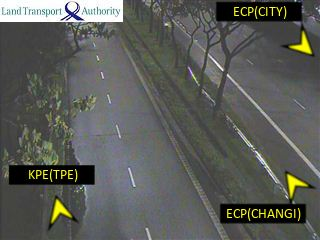

In [53]:
img_link_to_retrieve = surrounding_traffic_images_list[0]["ImageLink"]
img_link_to_retrieve
from IPython.display import display # For notebook purposes.
response = requests.get(img_link_to_retrieve, stream=True)
print(response)
try:
    img = Image.open(response.raw)
    display(img)
except UnidentifiedImageError:
    print("Unable to identify link as image file, hence image cannot be displayed ")


## BUS STOPS

Returns detailed information for all bus stops currently being serviced by
buses, including: Bus Stop Code, location coordinates.

In [54]:
busstop_url = "http://datamall2.mytransport.sg/ltaodataservice/BusStops"
busstop_api_response = api_query(api_link=busstop_url, agent_id="test", api_key=LTA_API_KEY)

busstop_list = busstop_api_response.get("value")

test_point = tuple([1.29685,103.853])
surrounding_busstop_list, nearest_busstop_list = geodesic_distance_filter(centre_point=test_point, radius_in_km=radius, data_list=busstop_list, latitude_key_name="Latitude", longitude_key_name="Longitude")

len(surrounding_busstop_list)

Request successful with status code 200


1

In [55]:
surrounding_busstop_list

[{'BusStopCode': '01012',
  'RoadName': 'Victoria St',
  'Description': 'Hotel Grand Pacific',
  'Latitude': 1.29684825487647,
  'Longitude': 103.85253591654006}]

## Taxi Stand

Returns detailed information of Taxi stands, such as location and whether is it
barrier free.

In [56]:
taxi_stand_url = "http://datamall2.mytransport.sg/ltaodataservice/TaxiStands"
taxi_stand_api_response = api_query(api_link=taxi_stand_url, agent_id="test", api_key=LTA_API_KEY)

taxi_stand_list = taxi_stand_api_response.get("value")

surrounding_taxi_stand_list, nearest_taxi_stand = geodesic_distance_filter(centre_point=test_point, radius_in_km=radius, data_list=taxi_stand_list, latitude_key_name="Latitude", longitude_key_name="Longitude")
print(len(surrounding_taxi_stand_list))
surrounding_taxi_stand_list

Request successful with status code 200
1


[{'TaxiCode': 'B06',
  'Latitude': 1.297702738,
  'Longitude': 103.8490929,
  'Bfa': 'Yes',
  'Ownership': 'Private',
  'Type': 'Stop',
  'Name': 'Bencoolen St at SMU School of Econ & Social Sciences'}]

## Bicycle parking

Returns bicycle parking locations within a radius. The default radius is
set as 0.5km


In [ ]:
bicycle_parking_url = "http://datamall2.mytransport.sg/ltaodataservice/BicycleParkingv2"


# Pass in required lat/long/dist parameters
bicycle_parking_api_response = api_query(api_link=bicycle_parking_url, agent_id="test", api_key=LTA_API_KEY,  params_dict={"Lat":test_point[0], "Long": test_point[1], "Dist": radius})

bicycle_parking_list = bicycle_parking_api_response.get("value")

surrounding_bicycle_parking_list, nearest_bicycle_parking_list = geodesic_distance_filter(centre_point=test_point, radius_in_km=radius, data_list=bicycle_parking_list, latitude_key_name="Latitude", longitude_key_name="Longitude")

surrounding_bicycle_parking_list

## TrafficSpeedBands
Returns current traffic speeds on expressways and arterial roads,
expressed in speed bands.


In [ ]:
# TrafficFlow
traffic_speed_band_url = "http://datamall2.mytransport.sg/ltaodataservice/v3/TrafficSpeedBands"
traffic_speed_api_response = api_query(api_link=traffic_speed_band_url, agent_id="test", api_key=LTA_API_KEY)

traffic_speed_band_list = traffic_speed_api_response.get("value")
len(traffic_speed_band_list)

In [ ]:
traffic_speed_band_list